In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


## Binary Encoding of Categorical Variables

In [4]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


## Checking for Missing Values

In [6]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Segregating the target variable from the features

In [8]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

## Splitting the data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

## Model Training

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

## Cross Validation

In [11]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [12]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

### Things we can experiment with:

1. We can change the data and run the code again
2. 

In [13]:
import mlflow
import os

## Set the Experiment Name

1. Set the name to define where we are going to perform all the work 

In [14]:
mlflow.set_experiment('loan_status')

2025/04/18 00:02:37 INFO mlflow.tracking.fluent: Experiment with name 'loan_status' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/shankarvishnu/Desktop/code/MLOps/MLFlow/mlruns/857163537668241456', creation_time=1744914757974, experiment_id='857163537668241456', last_update_time=1744914757974, lifecycle_stage='active', name='loan_status', tags={}>

In [15]:
with mlflow.start_run():
    # Training the model
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    # Capturing the validation accuracy
    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)

    # Capturing the training accuracy
    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    mlflow.set_tag('ml_flow.runName', 'first_run')
    mlflow.log_param('max_depth', 4) 
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc', train_acc)
    mlflow.sklearn.log_model(model_rf, 'model')

2025/04/18 00:02:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Training On New Data

In [17]:
train_df = pd.read_csv('data_new.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [19]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)
    
    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)
    
    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)
    
    mlflow.set_tag('mlflow.runName','new_data_version')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')
    
    mlflow.sklearn.log_model(model_rf, "model")
    

2025/04/18 00:44:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Hyper-Parameter Tuning Of RF Model

In [20]:
def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, 
                                          max_depth=max_dep, 
                                          random_state=5)
        
        # Train the model
        model_rf.fit(X_train, y_train)


        # Capture the validation accuracy
        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        # Capture the training accuracy
        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        # Log the parameters and metrics
        
        run_name="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName', run_name)
        mlflow.log_param('n_estimators', n_est)
        mlflow.log_param('max_depth', max_dep)
        mlflow.log_metric('val_acc', val_acc)
        mlflow.log_metric('train_acc', train_acc)
        mlflow.set_tag('data file', 'data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")

In [21]:
mlflow_runs(10,2,1)

2025/04/18 00:54:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

2025/04/18 00:54:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/18 00:54:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/18 00:54:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/18 00:54:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/18 00:54:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/18 00:54:52 

## Now Train With Another Model -- KNN

Matplotlib is building the font cache; this may take a moment.
2025/04/18 01:01:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


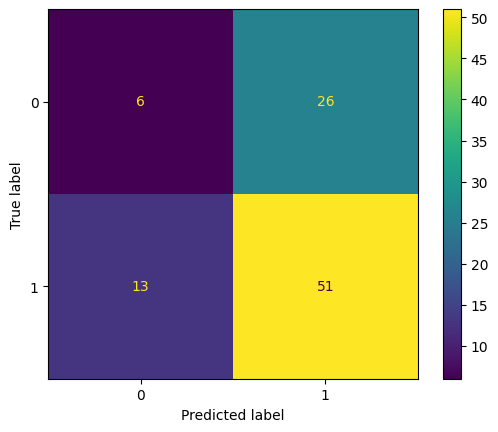

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')
    
    # Plotting the confusion matrix
    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    # Saving the confusion matrix
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "model")